In [1]:
#Librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [106]:
#Levantamos el df_final2
df_final2 = pd.read_csv('df_final2.csv')

#Generamos el X y el target
X = df_final2.drop(['target'], axis = 1)
y = df_final2['target']

#Divimos en train y en test
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size= 0.25)

#Estandarizamos con MinMax
scaler = MinMaxScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

In [63]:
# Buscamos los mejores hiperparametros

#model = LogisticRegression()
#solvers = ['newton-cg', 'lbfgs', 'liblinear']
#penalty = ['l2']
#c_values = [100, 10, 1.0, 0.1, 0.01]

# Defnimos una grilla con GridSearch

#grid = dict(solver=solvers,penalty=penalty,C=c_values)
#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=999)
#grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
#grid_result = grid_search.fit(X_train_std, y_train)

# Vemos los resultados

#print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
#means = grid_result.cv_results_['mean_test_score']
#stds = grid_result.cv_results_['std_test_score']
#params = grid_result.cv_results_['params']
#for mean, stdev, param in zip(means, stds, params):
    #print("%f (%f) with: %r" % (mean, stdev, param))

In [107]:
#Instanciamos el modelo y los ajustamos a los datos de entrenamiento
model = LogisticRegression(C=10, penalty = 'l2', solver= 'liblinear')
model.fit(X_train_std, y_train)

LogisticRegression(C=10, solver='liblinear')

In [108]:
#Para UN solo fold
#Hacemos las predicciones necesarias
y_pred = model.predict(X_test_std)
print(y_pred)
#Evaluamos el score
print('')
print('Score: ', accuracy_score(y_test, y_pred))

[22. 22. 22. 22. 22. 22. 22. 21. 22. 22. 22. 22. 32. 21. 32. 22. 22. 22.
 22. 22. 22. 32. 32. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 21. 21. 22.
 22. 22. 22. 22. 22. 22. 22. 22. 21. 22. 22. 22. 22. 22. 22. 22. 22. 22.
 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 32. 32. 22. 22.
 22. 21. 21. 21. 22. 22. 22. 21. 22. 22. 22. 22. 32. 21. 22. 32. 22. 22.
 32. 22. 22. 22. 22. 21. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 21. 32.
 22. 22. 21. 22. 22. 22. 32. 32. 22. 22. 22. 22. 22. 22. 22. 22. 22. 32.
 22. 21. 22. 22. 22. 22. 22. 22. 22. 22. 21. 22. 22. 22. 22. 22. 22. 22.
 22. 22. 21. 32. 21. 21. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 32.
 22. 21. 22. 22. 22. 22. 21. 22. 22. 22. 22. 22. 22. 22. 22. 21. 22. 22.
 22. 21. 22. 22. 22. 22. 21. 22. 22. 22. 22. 22. 21. 22. 22. 22. 22. 22.]

Score:  0.4494949494949495


In [109]:
#Generalizamos para 20 folds
stratifiedkf=StratifiedKFold(n_splits=20)
score=cross_val_score(model,X_train_std,y_train,cv=stratifiedkf)
print("Los scores obtenidos son {}".format(score))
print("El promedio es :{}".format(score.mean()))

C:\Users\DataScience\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=20.
  warnings.warn(


Los scores obtenidos son [0.43333333 0.56666667 0.5        0.5        0.43333333 0.4
 0.4        0.43333333 0.46666667 0.53333333 0.4        0.36666667
 0.3        0.55172414 0.4137931  0.34482759 0.51724138 0.44827586
 0.48275862 0.44827586]
El promedio es :0.4470114942528737


In [110]:
model.coef_

array([[ 1.28795918,  1.07277981,  0.56604613, -0.48790473, -1.41047053,
        -0.30963287, -1.98844272, -1.47538855,  0.43239714, -1.85245632,
         0.7415656 , -0.01604877, -0.77491416,  1.24460423,  0.4374237 ,
         0.60164594,  0.35988215, -0.86640318,  0.05038989,  0.99726056,
        -1.43235619,  1.73911545, -1.31925399, -0.22627612, -0.05756771,
        -0.92128848, -0.24614467, -0.95985287, -2.54068611, -0.65708116,
        -0.06146721, -1.6807022 ],
       [ 1.24386946,  0.7798201 , -0.51284333, -2.578149  , -0.47427579,
        -0.01829357,  2.05722091,  2.35557642, -1.20565749, -0.1736549 ,
        -0.24931311, -0.87671834,  1.55942102, -1.35410553,  1.27294944,
        -0.81559564,  0.29917221, -0.2087757 , -1.70910725,  2.16529269,
        -0.62631889,  0.98458939,  0.03410669,  0.04709617,  0.74837483,
        -0.13296846, -1.32386408, -0.13353408, -0.20274884, -1.90016633,
        -1.1691098 , -1.23656229],
       [-1.13673554, -0.19256897,  0.57109176,  2.1728

In [112]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Greens',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label', color= 'white')
        plt.xlabel('Predicted label' + stats_text, color= 'white')
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [111]:
cf_matrix = confusion_matrix(y_test, y_pred)

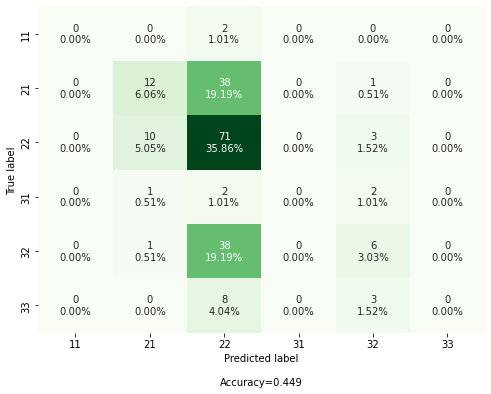

In [129]:
make_confusion_matrix(cf_matrix, categories= [11,21,22,31,32,33] , figsize=(8,6), cbar=False)

In [71]:
################################################################################################################################

In [108]:
#Hagamos regresion logística con el data set alternativo

#Levantamos el df_final_alternativo
df_final_alternativo = pd.read_csv('df_final_alternativo.csv')

#Generamos el X y el target
Xa = df_final_alternativo.drop(['ClasificacionNum2', 'ID'], axis = 1)
ya = df_final_alternativo['ClasificacionNum2']

#Divimos en train y en test
Xa_train, Xa_test, ya_train, ya_test = train_test_split(Xa,ya, stratify=ya, test_size= 0.25)

#Estandarizamos con MinMax
scaler = MinMaxScaler()

Xa_train_std = scaler.fit_transform(Xa_train)
Xa_test_std = scaler.fit_transform(Xa_test)

In [60]:
# Buscamos los mejores hiperparametros

modelo = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# Defnimos una grilla con GridSearch

grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=20, n_repeats=3, random_state=999)
grid_search = GridSearchCV(estimator=modelo, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(Xa_train_std, ya_train)

# Vemos los resultados

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.745996 using {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.744387 (0.076984) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.743257 (0.076182) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.744387 (0.076984) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.741590 (0.069548) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.741590 (0.069548) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.743276 (0.069548) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.738563 (0.067349) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.738563 (0.067349) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.745996 (0.073688) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.732261 (0.059891) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.732261 (0.059891) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.737989 (0.060565) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.689904 (0.011469) wit

In [109]:
#Instanciamos el modelo y los ajustamos a los datos de entrenamiento
modelo = LogisticRegression(C=10, penalty = 'l2', solver= 'liblinear')
modelo.fit(Xa_train_std, ya_train)

LogisticRegression(C=10, solver='liblinear')

In [110]:
#Para UN solo fold
#Hacemos las predicciones necesarias
ya_pred = modelo.predict(Xa_test_std)
print(ya_pred)
#Evaluamos el score
print('')
print('Score: ', accuracy_score(ya_test, ya_pred))

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0
 0 0 1 0 0 0 0 0 0 0 1]

Score:  0.75


In [111]:
#Generalizamos para 20 folds
stratifiedkf=StratifiedKFold(n_splits=20)
score=cross_val_score(modelo,Xa_train_std,ya_train,cv=stratifiedkf)
print("Los scores obtenidos son {}".format(score))
print("El promedio es :{}".format(score.mean()))
print("La desviacion estandar es :", np.std(score))

Los scores obtenidos son [0.73333333 0.6        0.8        0.7        0.8        0.7
 0.86666667 0.8        0.79310345 0.79310345 0.62068966 0.72413793
 0.82758621 0.79310345 0.82758621 0.72413793 0.75862069 0.72413793
 0.86206897 0.79310345]
El promedio es :0.7620689655172415
La desviacion estandar es : 0.069572995035871


In [113]:
cf_matrix_a = confusion_matrix(ya_pred,ya_test)

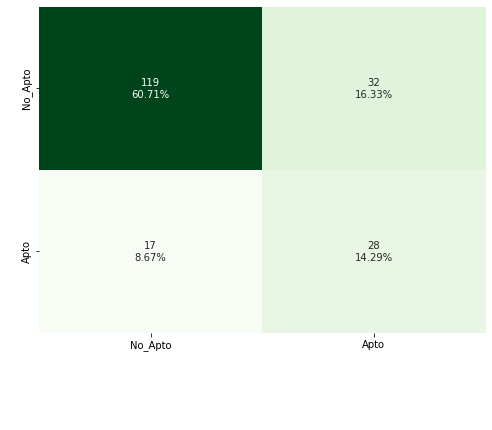

In [114]:
make_confusion_matrix(cf_matrix_a, categories= ['No_Apto', 'Apto'] , figsize=(8,6), cbar=False)

In [115]:
y_pred_proba = modelo.predict_proba(Xa_test_std)

In [116]:
display(y_pred_proba.shape, y_pred_proba)

(196, 2)

array([[0.50918943, 0.49081057],
       [0.96803903, 0.03196097],
       [0.65055044, 0.34944956],
       [0.70919803, 0.29080197],
       [0.52559513, 0.47440487],
       [0.93017988, 0.06982012],
       [0.58909844, 0.41090156],
       [0.59603566, 0.40396434],
       [0.9367362 , 0.0632638 ],
       [0.89702296, 0.10297704],
       [0.92915927, 0.07084073],
       [0.44606157, 0.55393843],
       [0.67497896, 0.32502104],
       [0.96800058, 0.03199942],
       [0.27288883, 0.72711117],
       [0.88459933, 0.11540067],
       [0.89272781, 0.10727219],
       [0.76841348, 0.23158652],
       [0.62399819, 0.37600181],
       [0.5842773 , 0.4157227 ],
       [0.59603566, 0.40396434],
       [0.96002194, 0.03997806],
       [0.86772882, 0.13227118],
       [0.62399819, 0.37600181],
       [0.42372464, 0.57627536],
       [0.85856903, 0.14143097],
       [0.83791849, 0.16208151],
       [0.52412666, 0.47587334],
       [0.91924702, 0.08075298],
       [0.62417125, 0.37582875],
       [0.

In [117]:
# Pertenencia a partir de las probabilidades
pd.Series(y_pred_proba[:,1]>0.4).astype(int).value_counts()
#0 no apto, 1 apto

0    117
1     79
dtype: int64

In [118]:
# Pertenencia calculada a partir del método .predict()
pd.Series(ya_pred).value_counts()

0    151
1     45
dtype: int64

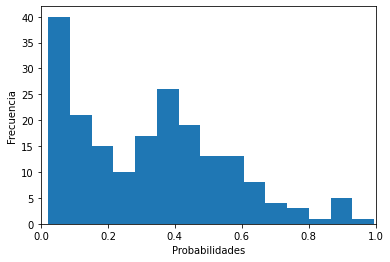

In [119]:
# Nos quedamos con la columna que tiene la probabilidad positiva de cada caso
y_probs_logit_left = y_pred_proba[:,1]

# Generamos un histograma de esa columna
plt.hist(y_probs_logit_left, bins=15)
plt.xlim(0,1)
plt.xlabel('Probabilidades')
plt.ylabel('Frecuencia')
plt.show()

In [120]:
#Cambiamos el umbral a 0.4
ya_pred_logit = (y_probs_logit_left > 0.22).astype(int)
cf_matrix_a_logit = confusion_matrix(ya_pred_logit,ya_test)

In [121]:
ya_pred_logit

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1])

In [122]:
print('Matrix Original')
display(confusion_matrix(ya_pred,ya_test))
print('')
print('Nueva Matrix')
display(confusion_matrix(ya_pred_logit,ya_test))

Matrix Original


array([[119,  32],
       [ 17,  28]], dtype=int64)


Nueva Matrix


array([[71,  5],
       [65, 55]], dtype=int64)

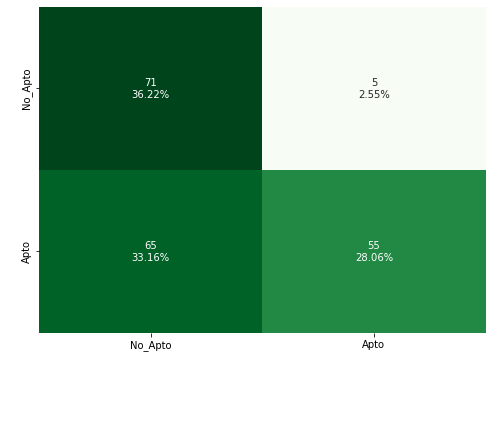

In [123]:
make_confusion_matrix(cf_matrix_a_logit, categories= ['No_Apto','Apto'] , figsize=(8,6), cbar=False)

In [124]:
modelo.coef_

array([[-0.32354605,  3.55710998, -0.12657234, -0.40911841, -0.21352072,
         0.81530662,  3.81286003, -0.04855901, -0.13160725,  0.66739191,
        -1.54875175,  0.93036392,  1.21506747, -2.68299535, -0.83075104,
        -1.87380783, -0.48902766, -0.90901603,  0.14969153, -0.03602885,
        -2.98456156,  0.28625996,  0.38034839, -0.5553255 ,  0.69961586,
        -1.42899266, -0.14744412, -0.29449568,  0.25663931,  0.30921083,
        -2.14171513,  0.9803167 ,  0.27919732]])

In [125]:
from sklearn.metrics import roc_curve
fpr_log,tpr_log,thr_log = roc_curve(ya_test, y_pred_proba[:,1])

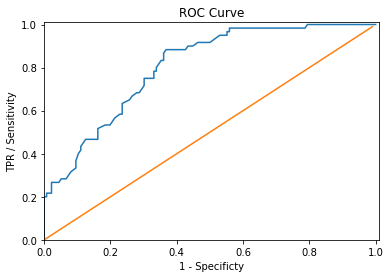

In [126]:
df = pd.DataFrame(dict(fpr=fpr_log, tpr=tpr_log, thr = thr_log))

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(df['fpr'],df['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

In [127]:
from sklearn.metrics import auc
print('AUC=', auc(fpr_log, tpr_log))

AUC= 0.8040441176470589
